# Predicting Water Treatment Plant Performance using Historical Data: An Analysis of Machine Learning Algorithms

### Importing All the libraries

In [237]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 2021

Getting data using Pandas

In [256]:
data = pd.read_excel("WTPData.xlsx", sheet_name='2021', header=1)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,pH,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Dennis Penney
0,Date,Shortcut,Start Time,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,...,Alum,Lime (Pre),Lime (Post),Date,NaN,NaN,NaN,NaN,NaN,Jerry Loveless
1,2021-01-01 00:00:00,Click Here,NaN,6.07,5.19,5.25,5.28,5.34,7.42,7.53,...,30.56,4.8,9.3,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,Nolan Simms
2,2021-01-02 00:00:00,Click Here,NaN,6.01,5.14,5.23,5.3,5.37,7.46,7.51,...,30.38,4.8,9.3,2021-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-03 00:00:00,Click Here,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04 00:00:00,Click Here,NaN,5.83,5.17,5.21,5.36,5.37,6.8,7.39,...,31.92,4.8,9.3,2021-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,Continuous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,NaN,November,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,NaN,December,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,NaN,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,*analyzer replaced in September 2021 as other ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
pH = data.iloc[1:366,9].dropna()
turbidity  = data.iloc[1:366,25].dropna()
UVA  = data.iloc[1:366,48].dropna()
UVT  = data.iloc[1:366,46].dropna()
temprature = data.iloc[1:366,42].dropna()
Color  = data.iloc[1:366,15].dropna()

In [250]:
X = pd.concat([UVA, UVT], axis=1)
Y = pH

In [251]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=42)

In [252]:
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
model.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)

In [253]:
Y_pred = model.predict(X_test)
accuracy = r2_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9586711311355004


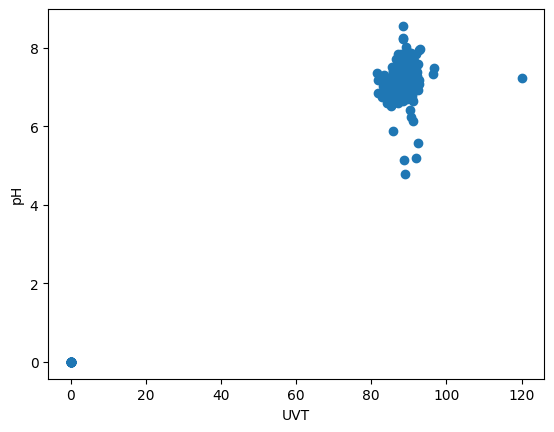

In [254]:
plt.scatter(UVT, pH)
plt.xlabel('UVT')
plt.ylabel('pH')
plt.show()

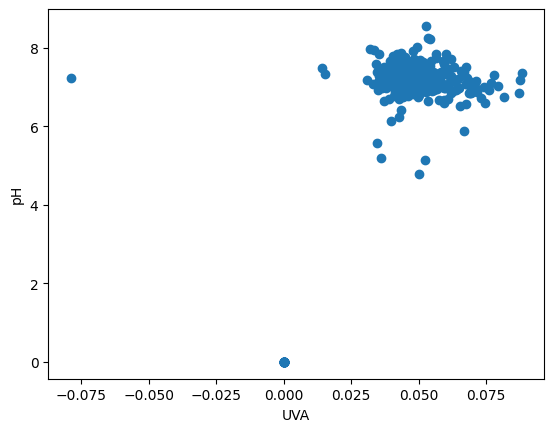

In [255]:
plt.scatter(UVA, pH)
plt.xlabel('UVA')
plt.ylabel('pH')
plt.show()